In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [3]:
df = pd.read_csv('incidents_small.csv', parse_dates=['Date'])
df

C:\Users\yashm\AppData\Local\Temp\ipykernel_12528\3464779290.py:1: DtypeWarning: Columns (1,2,3,5,6,7,8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('incidents_small.csv', parse_dates=['Date'])


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272.0,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,2016-01-29,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200580e+13
1,120058272.0,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,2016-01-29,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200580e+13
2,141059263.0,WARRANTS,WARRANT ARREST,Monday,2016-04-25,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",1.410590e+13
3,160013662.0,NON-CRIMINAL,LOST PROPERTY,Tuesday,2016-01-05,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",1.600140e+13
4,160002740.0,NON-CRIMINAL,LOST PROPERTY,Friday,2016-01-01,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",1.600030e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150495,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150496,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150497,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150498,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   IncidntNum  10019 non-null  float64       
 1   Category    10019 non-null  object        
 2   Descript    10019 non-null  object        
 3   DayOfWeek   10019 non-null  object        
 4   Date        10019 non-null  datetime64[ns]
 5   Time        10019 non-null  object        
 6   PdDistrict  10019 non-null  object        
 7   Resolution  10019 non-null  object        
 8   Address     10019 non-null  object        
 9   X           10019 non-null  float64       
 10  Y           10019 non-null  float64       
 11  Location    10019 non-null  object        
 12  PdId        10019 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 14.9+ MB


In [5]:
df.dropna(inplace=True)
df.shape

(10019, 13)

In [6]:
df.sort_values(by='Category', ascending=True, inplace=True)
df.head(30)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
7749,160264473.0,ARSON,ARSON OF A VEHICLE,Thursday,2016-03-31,05:24,PARK,NONE,200 Block of PARNASSUS AV,-122.453068,37.764505,"(37.7645048381303, -122.453068348596)",1.602640e+13
9245,160248223.0,ARSON,ARSON,Friday,2016-03-25,15:48,MISSION,"ARREST, BOOKED",16TH ST / VALENCIA ST,-122.421886,37.764918,"(37.7649178909424, -122.421886357981)",1.602480e+13
45,160010527.0,ARSON,ARSON OF A COMMERCIAL BUILDING,Monday,2016-01-04,20:08,MISSION,NONE,1500 Block of BRYANT ST,-122.410738,37.767524,"(37.767524308783, -122.410738097315)",1.600110e+13
3455,160173131.0,ARSON,ARSON OF A VEHICLE,Sunday,2016-02-28,01:00,BAYVIEW,NONE,600 Block of KEITH ST,-122.382779,37.737198,"(37.7371978950809, -122.382779253988)",1.601730e+13
5148,160623584.0,ARSON,ARSON,Tuesday,2016-08-02,17:43,SOUTHERN,NONE,100 Block of HAWTHORNE ST,-122.397071,37.784003,"(37.7840030154412, -122.397071005597)",1.606240e+13
7279,160122401.0,ARSON,ARSON OF A VEHICLE,Wednesday,2016-02-10,16:25,BAYVIEW,EXCEPTIONAL CLEARANCE,2500 Block of MARIN ST,-122.402767,37.748220,"(37.7482203413295, -122.402767417355)",1.601220e+13
7267,160257967.0,ARSON,ARSON OF AN INHABITED DWELLING,Monday,2016-03-28,23:00,TENDERLOIN,"ARREST, BOOKED",0 Block of TURK ST,-122.409854,37.783386,"(37.7833862379382, -122.409853729941)",1.602580e+13
296,160028081.0,ARSON,ARSON,Monday,2016-01-11,09:33,TENDERLOIN,NONE,0 Block of TURK ST,-122.409849,37.783276,"(37.7832755202567, -122.409849441655)",1.600280e+13
294,160027801.0,ARSON,ARSON OF A VEHICLE,Sunday,2016-01-10,19:15,PARK,NONE,600 Block of HAIGHT ST,-122.432940,37.771845,"(37.7718450016424, -122.43294024481)",1.600280e+13
4313,160570781.0,ARSON,ARSON,Friday,2016-07-15,05:19,CENTRAL,NONE,GRANT AV / POST ST,-122.405223,37.788694,"(37.7886936920129, -122.405222821755)",1.605710e+13


In [7]:
df.sort_values(by=['Date','IncidntNum'], ascending=False, inplace=True)
df.head(30)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
2467,150273337.0,WARRANTS,WARRANT ARREST,Wednesday,2016-12-21,18:17,TENDERLOIN,"ARREST, BOOKED",300 Block of JONES ST,-122.412759,37.784400,"(37.7843997500192, -122.412758846145)",1.502730e+13
116,150480366.0,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
117,150480366.0,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
118,150480366.0,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
115,150480366.0,VEHICLE THEFT,STOLEN AND RECOVERED VEHICLE,Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
5332,160220970.0,FRAUD,"CREDIT CARD, THEFT BY USE OF",Friday,2016-11-18,12:00,BAYVIEW,NONE,1200 Block of DEHARO ST,-122.400632,37.753965,"(37.7539653995399, -122.4006319548)",1.602210e+13
9554,160939676.0,ASSAULT,BATTERY,Monday,2016-11-14,09:20,NORTHERN,NONE,ELLIS ST / POLK ST,-122.419366,37.784028,"(37.7840280452032, -122.419366294797)",1.609400e+13
9964,160893652.0,NON-CRIMINAL,"CIVIL SIDEWALKS, WARNING",Wednesday,2016-11-02,18:02,MISSION,NONE,21ST ST / SHOTWELL ST,-122.415629,37.757232,"(37.757232227914, -122.415629332446)",1.608940e+13
9963,160893464.0,WEAPON LAWS,CARRYING A CONCEALED WEAPON,Wednesday,2016-11-02,16:42,BAYVIEW,NONE,1100 Block of 18TH ST,-122.394108,37.762671,"(37.7626705352496, -122.394108177688)",1.608930e+13
9962,160893395.0,ASSAULT,BATTERY,Wednesday,2016-11-02,16:15,TARAVAL,NONE,MONTEREY BL / NORTHGATE DR,-122.461737,37.730023,"(37.7300233378439, -122.461736679015)",1.608930e+13


In [8]:
df.Category.value_counts()

LARCENY/THEFT                  1566
OTHER OFFENSES                 1476
NON-CRIMINAL                   1242
ASSAULT                        1075
WARRANTS                        555
VEHICLE THEFT                   529
VANDALISM                       475
BURGLARY                        458
SUSPICIOUS OCC                  443
DRUG/NARCOTIC                   396
MISSING PERSON                  364
ROBBERY                         268
FRAUD                           188
SECONDARY CODES                 146
TRESPASS                        146
WEAPON LAWS                     141
RECOVERED VEHICLE                77
SEX OFFENSES, FORCIBLE           74
PROSTITUTION                     59
STOLEN PROPERTY                  55
DRUNKENNESS                      51
FORGERY/COUNTERFEITING           48
DISORDERLY CONDUCT               45
DRIVING UNDER THE INFLUENCE      32
ARSON                            28
KIDNAPPING                       22
RUNAWAY                          13
BRIBERY                     

In [9]:
category_count=df.Category.value_counts().head(10).reset_index()
category_count.columns=['Category','Case No.']
category_count


,Category,Case No.
0,LARCENY/THEFT,1566
1,OTHER OFFENSES,1476
2,NON-CRIMINAL,1242
3,ASSAULT,1075
4,WARRANTS,555
5,VEHICLE THEFT,529
6,VANDALISM,475
7,BURGLARY,458
8,SUSPICIOUS OCC,443
9,DRUG/NARCOTIC,396


<AxesSubplot: ylabel='Case No.'>

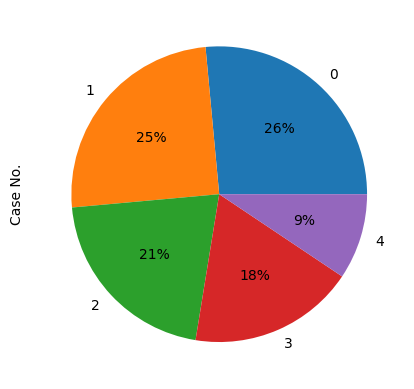

In [10]:
category_count['Case No.'].head().plot.pie(autopct='%1.f%%', x ='Category')

In [11]:
category_count_top_10 = category_count.head(10)
px.pie(category_count, 'Category','Case No.')

find the most common way of handling incidents by the PD, in SanFrancisco using visualization

In [12]:
# df.drop(df[df.Resolution=='NONE'].index)

In [13]:
month = df[df.Date.dt.month == 10].Category.value_counts()
month

OTHER OFFENSES     32
LARCENY/THEFT      25
ASSAULT            18
NON-CRIMINAL       16
VEHICLE THEFT      12
VANDALISM          12
DRUG/NARCOTIC      10
SUSPICIOUS OCC     10
BURGLARY            9
WARRANTS            8
MISSING PERSON      7
WEAPON LAWS         6
ROBBERY             5
SECONDARY CODES     5
PROSTITUTION        4
TRESPASS            2
FRAUD               1
Name: Category, dtype: int64

<AxesSubplot: ylabel='Category'>

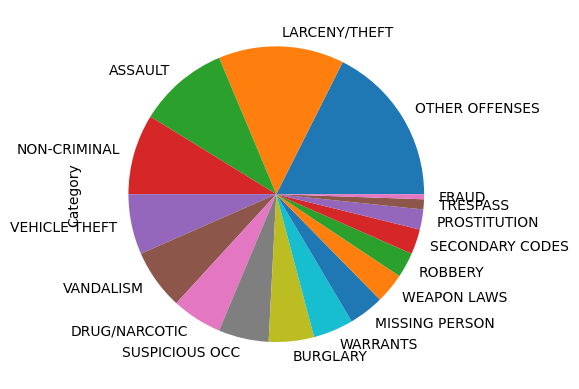

In [14]:
month.plot.pie()

group incident categories by month

In [15]:
month_wise_cases = df.groupby(df.Date.dt.month)['Category'].count().reset_index()
month_wise_cases.columns= ['Month','Case Count']
month_wise_cases

,Month,Case Count
0,1,2097
1,2,2387
2,3,3361
3,4,1334
4,5,82
5,6,111
6,7,149
7,8,160
8,9,138
9,10,182


In [16]:
px.bar(month_wise_cases, 'Month', 'Case Count')

In [17]:
def num_to_months(num):
    months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
    return months[num-1]
   

In [18]:
month_wise_cases['Month'] = month_wise_cases['Month'].apply(num_to_months)

In [19]:
px.bar(month_wise_cases, 'Month', 'Case Count')

In [20]:
df

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
2467,150273337.0,WARRANTS,WARRANT ARREST,Wednesday,2016-12-21,18:17,TENDERLOIN,"ARREST, BOOKED",300 Block of JONES ST,-122.412759,37.784400,"(37.7843997500192, -122.412758846145)",1.502730e+13
116,150480366.0,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
117,150480366.0,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
118,150480366.0,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
115,150480366.0,VEHICLE THEFT,STOLEN AND RECOVERED VEHICLE,Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,160000471.0,OTHER OFFENSES,CONSPIRACY,Friday,2016-01-01,02:04,TENDERLOIN,"ARREST, BOOKED",100 Block of TAYLOR ST,-122.410792,37.783695,"(37.7836952269749, -122.410791677645)",1.600000e+13
143,160000471.0,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,2016-01-01,02:04,TENDERLOIN,"ARREST, BOOKED",100 Block of TAYLOR ST,-122.410792,37.783695,"(37.7836952269749, -122.410791677645)",1.600000e+13
132,160000211.0,OTHER OFFENSES,INTERFERRING WITH A POLICE OFFICER,Friday,2016-01-01,00:50,SOUTHERN,"ARREST, BOOKED",MARKET ST / BEALE ST,-122.397388,37.792405,"(37.7924047319625, -122.397387796127)",1.600000e+13
2796,151123444.0,FORGERY/COUNTERFEITING,"FINANCIAL STATEMENTS, FALSE",Friday,2016-01-01,00:01,CENTRAL,UNFOUNDED,600 Block of GEARY ST,-122.414011,37.786677,"(37.7866770011071, -122.414010814727)",1.511230e+13


In [22]:
df.pivot_table(index='Category', columns='Resolution', values='IncidntNum', aggfunc='count')

Resolution,"ARREST, BOOKED","ARREST, CITED",CLEARED-CONTACT JUVENILE FOR MORE INFO,COMPLAINANT REFUSES TO PROSECUTE,EXCEPTIONAL CLEARANCE,JUVENILE BOOKED,JUVENILE DIVERTED,LOCATED,NONE,NOT PROSECUTED,PSYCHOPATHIC CASE,UNFOUNDED
Category,,,,,,,,,,,,
ARSON,6.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,20.0,NaN,NaN,NaN
ASSAULT,427.0,NaN,1.0,NaN,2.0,9.0,NaN,NaN,633.0,NaN,NaN,3.0
BRIBERY,4.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN
BURGLARY,79.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,376.0,NaN,NaN,1.0
DISORDERLY CONDUCT,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,1.0
DRIVING UNDER THE INFLUENCE,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
DRUG/NARCOTIC,364.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,29.0,1.0,NaN,NaN
DRUNKENNESS,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN
EMBEZZLEMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN


In [23]:
df.pivot_table(index='Category', columns='DayOfWeek', values='IncidntNum', aggfunc='count')

DayOfWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Category,,,,,,,
ARSON,7.0,4.0,3.0,5.0,5.0,1.0,3.0
ASSAULT,161.0,157.0,169.0,155.0,137.0,137.0,159.0
BRIBERY,2.0,1.0,2.0,3.0,NaN,2.0,3.0
BURGLARY,77.0,60.0,55.0,59.0,72.0,74.0,61.0
DISORDERLY CONDUCT,3.0,13.0,5.0,3.0,5.0,8.0,8.0
DRIVING UNDER THE INFLUENCE,6.0,2.0,13.0,3.0,7.0,NaN,1.0
DRUG/NARCOTIC,53.0,73.0,46.0,52.0,45.0,60.0,67.0
DRUNKENNESS,8.0,4.0,11.0,6.0,10.0,7.0,5.0
EMBEZZLEMENT,NaN,NaN,1.0,1.0,2.0,NaN,1.0


Applying a function

In [28]:
df['Category']=df['Category'].apply(lambda val:val.lower())
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
2467,150273337.0,warrants,WARRANT ARREST,Wednesday,2016-12-21,18:17,TENDERLOIN,"ARREST, BOOKED",300 Block of JONES ST,-122.412759,37.784400,"(37.7843997500192, -122.412758846145)",1.502730e+13
116,150480366.0,drunkenness,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
117,150480366.0,vandalism,"MALICIOUS MISCHIEF, VANDALISM",Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
118,150480366.0,vandalism,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
115,150480366.0,vehicle theft,STOLEN AND RECOVERED VEHICLE,Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13


In [29]:
df['Descript']=df['Descript'].apply(lambda val:val.lower())
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
2467,150273337.0,warrants,warrant arrest,Wednesday,2016-12-21,18:17,TENDERLOIN,"ARREST, BOOKED",300 Block of JONES ST,-122.412759,37.784400,"(37.7843997500192, -122.412758846145)",1.502730e+13
116,150480366.0,drunkenness,under influence of alcohol in a public place,Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
117,150480366.0,vandalism,"malicious mischief, vandalism",Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
118,150480366.0,vandalism,"malicious mischief, vandalism of vehicles",Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
115,150480366.0,vehicle theft,stolen and recovered vehicle,Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13


In [30]:
df['PdDistrict']=df['PdDistrict'].apply(lambda val:val.lower())
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
2467,150273337.0,warrants,warrant arrest,Wednesday,2016-12-21,18:17,tenderloin,"ARREST, BOOKED",300 Block of JONES ST,-122.412759,37.784400,"(37.7843997500192, -122.412758846145)",1.502730e+13
116,150480366.0,drunkenness,under influence of alcohol in a public place,Thursday,2016-12-08,15:00,northern,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
117,150480366.0,vandalism,"malicious mischief, vandalism",Thursday,2016-12-08,15:00,northern,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
118,150480366.0,vandalism,"malicious mischief, vandalism of vehicles",Thursday,2016-12-08,15:00,northern,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
115,150480366.0,vehicle theft,stolen and recovered vehicle,Thursday,2016-12-08,15:00,northern,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13


In [31]:
df['Resolution']=df['Resolution'].apply(lambda val:val.lower())
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
2467,150273337.0,warrants,warrant arrest,Wednesday,2016-12-21,18:17,tenderloin,"arrest, booked",300 Block of JONES ST,-122.412759,37.784400,"(37.7843997500192, -122.412758846145)",1.502730e+13
116,150480366.0,drunkenness,under influence of alcohol in a public place,Thursday,2016-12-08,15:00,northern,"arrest, booked",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
117,150480366.0,vandalism,"malicious mischief, vandalism",Thursday,2016-12-08,15:00,northern,"arrest, booked",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
118,150480366.0,vandalism,"malicious mischief, vandalism of vehicles",Thursday,2016-12-08,15:00,northern,"arrest, booked",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
115,150480366.0,vehicle theft,stolen and recovered vehicle,Thursday,2016-12-08,15:00,northern,"arrest, booked",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13


In [32]:
df['Address']=df['Address'].apply(lambda val:val.lower())
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
2467,150273337.0,warrants,warrant arrest,Wednesday,2016-12-21,18:17,tenderloin,"arrest, booked",300 block of jones st,-122.412759,37.784400,"(37.7843997500192, -122.412758846145)",1.502730e+13
116,150480366.0,drunkenness,under influence of alcohol in a public place,Thursday,2016-12-08,15:00,northern,"arrest, booked",pine st / polk st,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
117,150480366.0,vandalism,"malicious mischief, vandalism",Thursday,2016-12-08,15:00,northern,"arrest, booked",pine st / polk st,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
118,150480366.0,vandalism,"malicious mischief, vandalism of vehicles",Thursday,2016-12-08,15:00,northern,"arrest, booked",pine st / polk st,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
115,150480366.0,vehicle theft,stolen and recovered vehicle,Thursday,2016-12-08,15:00,northern,"arrest, booked",pine st / polk st,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13


In [34]:
tips = px.data.tips() #us restaraunt tips dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [35]:
tips.total_bill - tips.tip

0      15.98
1       8.68
2      17.51
3      20.37
4      20.98
       ...  
239    23.11
240    25.18
241    20.67
242    16.07
243    15.78
Length: 244, dtype: float64

Adding a new columns (augmentation)

In [36]:
tips['food_bill'] = tips.total_bill-tips.tip
tips.head()

,total_bill,tip,sex,smoker,day,time,size,food_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98


In [38]:
tips.sort_values(by='food_bill', ascending=False, inplace=True)
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size,food_bill
156,48.17,5.0,Male,No,Sun,Dinner,6,43.17
182,45.35,3.5,Male,Yes,Sun,Dinner,3,41.85


In [39]:
tips.pivot_table(index='day', columns='sex', values='food_bill', aggfunc=['max','min'])

max           min      
sex  Female   Male Female  Male
day                            
Fri   19.50  35.44   4.75  6.66
Sat   41.80  41.54   2.07  6.30
Sun   30.26  43.17   5.60  2.10
Thur  38.11  36.19   6.85  5.51

### syntax for plotly express
.... 
px.func(dataframe, colname, colname2, othersetting)


In [40]:
px.bar(tips, ['total_bill','food_bill'])

In [41]:
px.box(tips, 'total_bill')

In [44]:
px.box(tips, 'total_bill', color='sex')

In [45]:
px.box(tips, 'total_bill', color='smoker')

In [49]:
px.scatter(tips,'total_bill', 'tip', color='sex', facet_col='day')

In [50]:
df = px.data.gapminder()
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [52]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [53]:
dfc = df[df.country=='India']

In [55]:
px.bar(dfc, 'year', 'lifeExp')

In [56]:

dfc1 = df[df.country=='Albania']


In [60]:
px.funnel(dfc1, 'year','gdpPercap')

In [64]:
px.scatter_3d(df, x='year', y='lifeExp', z='pop', hover_data=['country'], size='pop', color='continent')

In [65]:
px.scatter(df, y='gdpPercap', x='lifeExp', hover_data=['country'], color='continent', size='pop', animation_frame='year', animation_group='country')

In [69]:
continent=df.groupby('continent').mean()
continent

C:\Users\yashm\AppData\Local\Temp\ipykernel_12528\3849494978.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,year,lifeExp,pop,gdpPercap,iso_num
continent,,,,,
Africa,1979.5,48.865330,9.916003e+06,2193.754578,458.826923
Americas,1979.5,64.658737,2.450479e+07,7136.110356,393.720000
Asia,1979.5,60.064903,7.703872e+07,7902.150428,404.666667
Europe,1979.5,71.903686,1.716976e+07,14469.475533,427.633333
Oceania,1979.5,74.326208,8.874672e+06,18621.609223,295.000000


In [71]:
px.sunburst(df, path=['continent','country','year'], values='pop')

In [72]:
px.icicle(df, path=['continent','country','year'], values='pop')